In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from numpy import asarray
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")


# Importing Dataset

In [3]:
df=pd.read_csv('Housing.csv')

In [4]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Data Cleaning and Exploration

In [5]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [6]:
# So, df.isna().sum() returns a series where the index is the column names and the values are the counts of missing values in each column
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
# The df.describe() function is a method in pandas, a Python library, that generates descriptive statistics of a DataFrame. 
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
# The df.info() function is a method in pandas, a Python library, that provides a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# Ordinal Encoder

In [9]:
# It is used to transform categorical features into ordinal numerical values.
oe=OrdinalEncoder()
l=['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea', 'furnishingstatus']
for i in l:
    oe.fit(asarray(df[i]).reshape(-1,1))
    df[i]=oe.transform(asarray(df[i]).reshape(-1,1))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    float64
 6   guestroom         545 non-null    float64
 7   basement          545 non-null    float64
 8   hotwaterheating   545 non-null    float64
 9   airconditioning   545 non-null    float64
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    float64
 12  furnishingstatus  545 non-null    float64
dtypes: float64(7), int64(6)
memory usage: 55.5 KB


In [11]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,0.0
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,0.0
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,1.0
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,0.0
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1.0,0.0,1.0,0.0,0.0,2,0.0,2.0
541,1767150,2400,3,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0
542,1750000,3620,2,1,1,1.0,0.0,0.0,0.0,0.0,0,0.0,2.0
543,1750000,2910,3,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


# Outlier detection and analysis

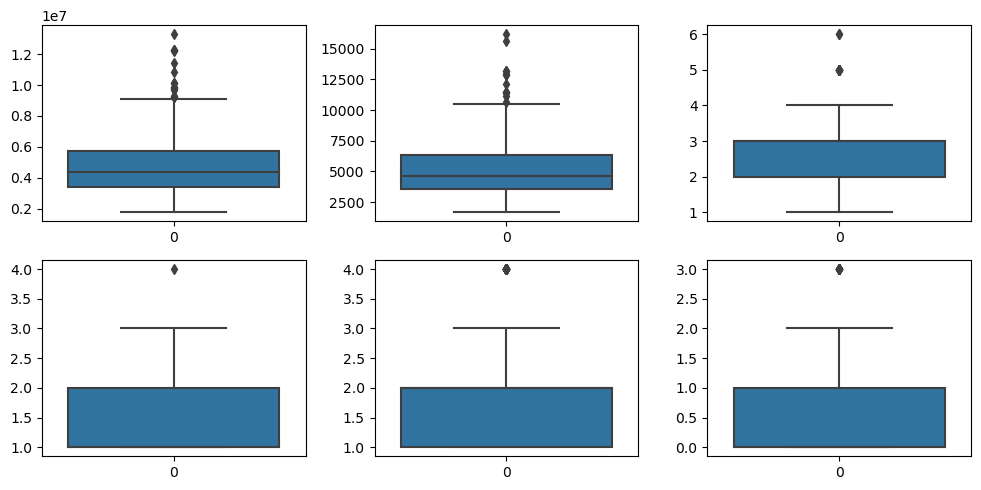

In [12]:
#  It is used to create a figure with multiple box plots.
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

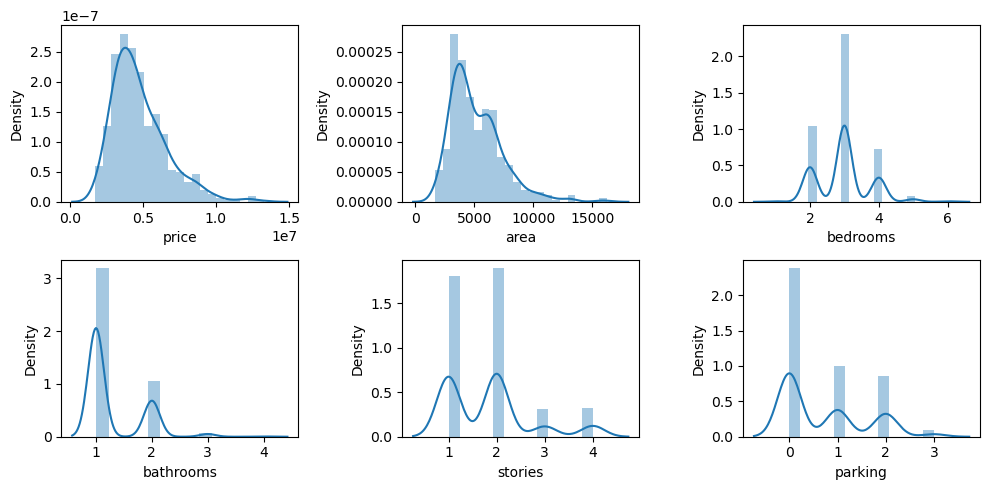

In [13]:
#  It is used to create a figure with multiple distplots.
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.distplot(df['price'], ax = axs[0,0])
plt2 = sns.distplot(df['area'], ax = axs[0,1])
plt3 = sns.distplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.distplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.distplot(df['stories'], ax = axs[1,1])
plt3 = sns.distplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

In [14]:
df['area'].describe()

count      545.000000
mean      5150.541284
std       2170.141023
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      16200.000000
Name: area, dtype: float64

In [15]:
cols=['area','price','bedrooms','bathrooms','stories','parking']
for col in cols:
    upper_limit=df[col].quantile(0.99)
    lower_limit=df[col].quantile(0.01)
    df[col]=np.where(df[col]>=upper_limit,
                    upper_limit,
                    df[col])

# Feature Selection

In [16]:
# The df.corr() function in pandas, a Python library, computes the pairwise correlation of all columns in the DataFrame.
corr_matrix=df.corr()
corr_matrix

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.544695,0.375067,0.512730,0.425892,0.303137,0.266041,0.190360,0.098201,0.458383,0.379397,0.330472,-0.304749
area,0.544695,1.000000,0.153854,0.187975,0.089419,0.294850,0.148276,0.052138,-0.010577,0.227620,0.361341,0.245059,-0.178875
bedrooms,0.375067,0.153854,1.000000,0.379272,0.414607,-0.014299,0.084321,0.102742,0.047968,0.166864,0.142856,0.083217,-0.124946
bathrooms,0.512730,0.187975,0.379272,1.000000,0.322147,0.041591,0.130288,0.106522,0.069084,0.184532,0.170474,0.066579,-0.140707
stories,0.425892,0.089419,0.414607,0.322147,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.303137,0.294850,-0.014299,0.041591,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.266041,0.148276,0.084321,0.130288,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.190360,0.052138,0.102742,0.106522,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.098201,-0.010577,0.047968,0.069084,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.458383,0.227620,0.166864,0.184532,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


In [17]:
# This function is a method in pandas, a Python library, that sorts the ‘price’ column of the correlation matrix corr_matrix in descending order
corr_matrix['price'].sort_values(ascending=False)

price               1.000000
area                0.544695
bathrooms           0.512730
airconditioning     0.458383
stories             0.425892
parking             0.379397
bedrooms            0.375067
prefarea            0.330472
mainroad            0.303137
guestroom           0.266041
basement            0.190360
hotwaterheating     0.098201
furnishingstatus   -0.304749
Name: price, dtype: float64

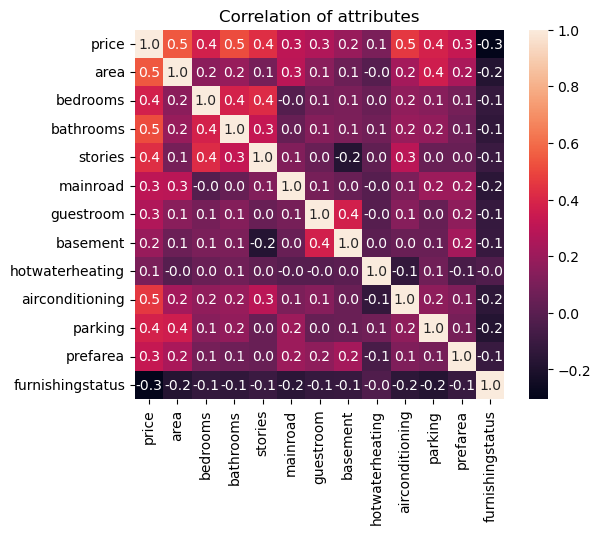

In [18]:
# It is used to create a heatmap of correlation matrix
plt.title("Correlation of attributes")
a=sns.heatmap(corr_matrix,square=True, annot=True, fmt=".1f", linecolor='white')

In [19]:
# Dropping the column hotwaterheating as it is highly imbalanced and has low corelation with other features and label.
df.drop('hotwaterheating', axis=1, inplace=True)

In [20]:
# Splitting df into features and label
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [21]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
0,7420.0,4.0,2.0,3.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0
1,8960.0,4.0,3.0,4.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0
2,9960.0,3.0,2.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0
3,7500.0,4.0,2.0,2.0,1.0,0.0,1.0,1.0,3.0,1.0,0.0
4,7420.0,4.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
540,3000.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0
541,2400.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
542,3620.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
543,2910.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
y

0      10542000.0
1      10542000.0
2      10542000.0
3      10542000.0
4      10542000.0
          ...    
540     1820000.0
541     1767150.0
542     1750000.0
543     1750000.0
544     1750000.0
Name: price, Length: 545, dtype: float64

# Spliting data for training and testing

In [23]:
# Splitting into training and testing data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(381, 11) (164, 11) (381,) (164,)


In [24]:
# Implementing Ridge regression 
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0) 
ridge.fit(xtrain,ytrain)
ridge_predictions = ridge.predict(xtest)

In [25]:
ridge_predictions

array([2807413.87236319, 3783047.16142756, 6056402.11570307,
       3963696.10730264, 6684174.97790978, 6959504.77380584,
       3733437.75930142, 3230665.41304749, 5344175.50352842,
       3141244.58489318, 5026210.03820942, 2298372.39092591,
       4178026.43344179, 4521925.70797065, 6592410.49257751,
       2769495.92343565, 7330214.00291882, 6278168.89936756,
       5233077.61510475, 4433021.90145863, 2710737.34810248,
       2116196.02775165, 6024020.46599707, 5374355.22452917,
       6659615.38632097, 6004004.84906789, 3746526.70147947,
       3850350.80220888, 3594991.54373854, 3877992.98867491,
       4416176.70467321, 5131290.52694274, 5635850.34282338,
       5533045.9411851 , 7491049.68738841, 5238963.36255482,
       6547154.66699131, 2474396.0313291 , 5331437.93590852,
       5438452.13403116, 4968373.75881686, 5433421.68779534,
       3032576.91151932, 6329163.59746411, 5832477.44113516,
       7744002.71594146, 7609258.78011135, 5945566.49513612,
       3577060.3974055 ,

In [26]:
from sklearn.metrics import r2_score
r2=r2_score(ytest,ridge_predictions)
print(r2)

0.7292703771240905


# Model Training

In [27]:
# Linear Regression Model 
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)
yhat=model.predict(xtest)

In [28]:
# Predicted data
yhat

array([2795205.77850866, 3779374.15400345, 6059346.96579593,
       3954471.1935769 , 6680881.87127795, 6967594.05493154,
       3724423.95746889, 3218052.39532781, 5353875.4451857 ,
       3140569.53805483, 5026435.23953127, 2287881.01734091,
       4186996.85772808, 4525516.69503918, 6598711.50490492,
       2758843.64986015, 7333767.94052422, 6285373.3465763 ,
       5236358.70977507, 4420595.29071297, 2709355.41958785,
       2107064.14019994, 6008571.45928546, 5377763.72937229,
       6667033.70359816, 6014507.82345708, 3742648.2123567 ,
       3843121.33063927, 3599664.69527102, 3876548.60184183,
       4423670.57283699, 5137916.05827504, 5627192.57441136,
       5534260.72710432, 7497215.98098911, 5233098.62656376,
       6559412.19256458, 2463192.35351257, 5331154.31877888,
       5453740.67062395, 4974898.6728783 , 5420552.61942393,
       3030875.25183142, 6350341.96550214, 5842965.49549381,
       7749777.16353165, 7602478.0177719 , 5955819.12614059,
       3584320.30494002,

In [29]:
# It represents the coefficients of the predictors in the model.
model.coef_

array([ 2.49402589e+02,  1.75388174e+05,  8.45493157e+05,  4.52896843e+05,
        4.22721415e+05,  2.49292054e+05,  4.54111285e+05,  8.31489301e+05,
        3.10615452e+05,  5.93778939e+05, -2.04251379e+05])

In [30]:
# It represents the intercept of the model
model.intercept_

140639.0146016013

# Model Evaluation

In [31]:
# It represents the performance of the model on test dataset
model.score(xtest,ytest)

0.7292983746958297

In [32]:
# R-squared value
from sklearn.metrics import r2_score
r2=r2_score(ytest,yhat)
print(r2)

0.7292983746958297


# Visualization

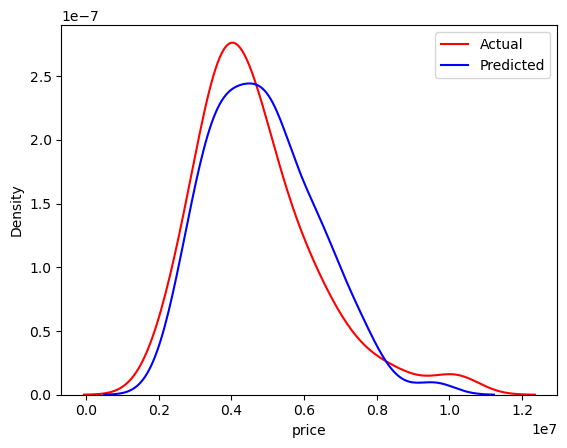

In [33]:
# Create a distribution plot of the actual values in red
sns.distplot(ytest, hist=False, color='red', label='Actual')
# Overlay a distribution plot of the predicted values in blue
sns.distplot(yhat, hist=False, color='blue', label='Predicted')
# Display the legend
plt.legend()
# Show the plot
plt.show()

# Model using MinMaxScaler

In [34]:
# Model using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
minmax.fit(xtrain)
xtrain.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,5054.627822,2.979003,1.301837,1.821522,0.868766,0.167979,0.338583,0.309711,0.650919,0.217848,1.070866
std,2002.202222,0.732393,0.503380,0.873383,0.338100,0.374339,0.473850,0.462983,0.834412,0.413326,0.766205
min,1700.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3600.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4500.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6240.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000
max,12543.600000,5.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [35]:
xtrain_minmax=minmax.transform(xtrain)
type(xtrain_minmax)

numpy.ndarray

In [36]:
xtrain_minmax=pd.DataFrame(xtrain_minmax,columns=xtrain.columns)
xtrain_minmax.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.309365,0.494751,0.150919,0.273841,0.868766,0.167979,0.338583,0.309711,0.216973,0.217848,0.535433
std,0.184644,0.183098,0.251690,0.291128,0.338100,0.374339,0.473850,0.462983,0.278137,0.413326,0.383102
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.175219,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.258217,0.500000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.418680,0.500000,0.500000,0.333333,1.000000,0.000000,1.000000,1.000000,0.333333,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
xtest_minmax=minmax.transform(xtest)
xtest_minmax=pd.DataFrame(xtest_minmax,columns=xtest.columns)
xtest_minmax.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.00000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.333820,0.480183,0.121951,0.256098,0.835366,0.20122,0.378049,0.329268,0.264228,0.274390,0.533537
std,0.213875,0.177285,0.235773,0.285045,0.371986,0.40214,0.486385,0.471387,0.305540,0.447573,0.376173
min,-0.004611,0.250000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173374,0.250000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.375000
50%,0.286575,0.500000,0.000000,0.333333,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.451879,0.500000,0.000000,0.333333,1.000000,0.00000,1.000000,1.000000,0.666667,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
xtrain_minmax

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
0,0.746984,0.75,0.5,0.333333,1.0,1.0,0.0,0.0,0.666667,0.0,0.5
1,0.446346,0.75,0.5,0.333333,1.0,1.0,1.0,1.0,0.666667,1.0,0.0
2,0.167841,0.25,0.0,0.333333,1.0,0.0,0.0,0.0,0.000000,1.0,0.0
3,0.604043,0.50,0.0,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.136486,0.75,0.0,0.333333,1.0,0.0,1.0,1.0,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
376,0.175219,0.25,0.0,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,0.0
377,0.241617,0.50,0.0,0.333333,1.0,0.0,0.0,0.0,0.666667,1.0,0.0
378,0.012542,0.25,0.0,0.000000,0.0,0.0,1.0,0.0,0.000000,0.0,0.5
379,1.000000,0.50,0.0,0.000000,1.0,0.0,0.0,1.0,0.666667,0.0,0.5


In [39]:
xtest_minmax

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
0,0.133719,0.50,0.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,1.0
1,0.215795,0.25,0.0,0.333333,1.0,0.0,0.0,0.0,0.333333,0.0,0.5
2,0.258217,0.75,0.5,0.333333,1.0,0.0,1.0,0.0,0.666667,0.0,0.0
3,0.341215,0.75,0.0,0.333333,1.0,0.0,0.0,0.0,0.000000,0.0,1.0
4,0.396547,0.75,0.5,1.000000,1.0,0.0,0.0,0.0,0.666667,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...
159,0.396547,0.50,0.5,1.000000,1.0,1.0,1.0,1.0,0.000000,1.0,0.5
160,0.158619,0.75,0.5,0.333333,1.0,0.0,1.0,1.0,0.666667,0.0,0.5
161,0.043805,0.50,0.0,0.333333,0.0,1.0,1.0,1.0,0.000000,0.0,1.0
162,0.320004,0.50,0.0,1.000000,1.0,0.0,0.0,1.0,0.000000,0.0,0.5


In [40]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(xtrain_minmax,ytrain)
yhat1=model1.predict(xtest_minmax)

In [41]:
from sklearn.metrics import r2_score
print(r2_score(ytest,yhat1))

0.7292983746958304


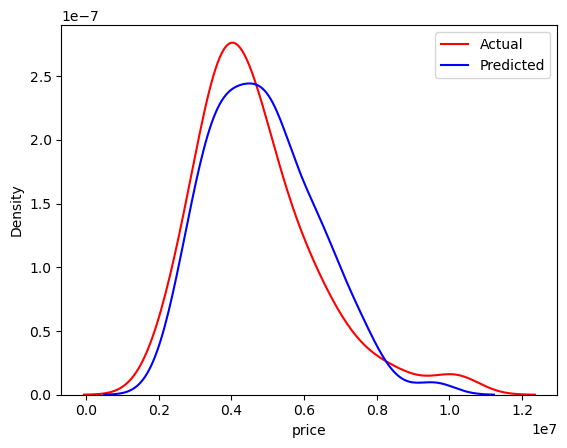

In [42]:
# Create a distribution plot of the actual values in red
sns.distplot(ytest, hist=False, color='red', label='Actual')
# Overlay a distribution plot of the predicted values in blue
sns.distplot(yhat1, hist=False, color='blue', label='Predicted')
# Display the legend
plt.legend()
# Show the plot
plt.show()

# Model using Standard Scaler

In [43]:
# Model using Standard Scaler
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
standard.fit(xtrain)
xtrain.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,5054.627822,2.979003,1.301837,1.821522,0.868766,0.167979,0.338583,0.309711,0.650919,0.217848,1.070866
std,2002.202222,0.732393,0.503380,0.873383,0.338100,0.374339,0.473850,0.462983,0.834412,0.413326,0.766205
min,1700.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3600.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4500.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6240.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000
max,12543.600000,5.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [44]:
xtrain_standard=standard.transform(xtrain)
type(xtrain_standard)

numpy.ndarray

In [45]:
xtrain_standard=pd.DataFrame(xtrain_standard,columns=xtrain.columns)
xtrain_standard.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
count,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02
mean,1.352083e-16,1.352083e-16,1.049030e-16,3.496765e-17,4.895472e-17,4.895472e-17,-7.692884e-17,-5.128589e-17,3.963001e-17,-1.025718e-16,-1.200556e-16
std,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00
min,-1.677672e+00,-2.705656e+00,-6.004096e-01,-9.418572e-01,-2.572936e+00,-4.493248e-01,-7.154752e-01,-6.698277e-01,-7.811188e-01,-5.277532e-01,-1.399461e+00
25%,-7.274692e-01,2.870723e-02,-6.004096e-01,-9.418572e-01,3.886610e-01,-4.493248e-01,-7.154752e-01,-6.698277e-01,-7.811188e-01,-5.277532e-01,-1.399461e+00
50%,-2.773731e-01,2.870723e-02,-6.004096e-01,2.046207e-01,3.886610e-01,-4.493248e-01,-7.154752e-01,-6.698277e-01,-7.811188e-01,-5.277532e-01,-9.261142e-02
75%,5.928127e-01,2.870723e-02,1.388774e+00,2.046207e-01,3.886610e-01,-4.493248e-01,1.397672e+00,1.492921e+00,4.189065e-01,-5.277532e-01,1.214239e+00
max,3.745286e+00,2.763071e+00,3.377957e+00,2.497577e+00,3.886610e-01,2.225562e+00,1.397672e+00,1.492921e+00,2.818957e+00,1.894825e+00,1.214239e+00


In [46]:
xtest_standard=standard.transform(xtest)
xtest_standard=pd.DataFrame(xtest_standard,columns=xtest.columns)
xtest_standard.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.132621,-0.079667,-0.115243,-0.061027,-0.098919,0.088915,0.083398,0.042297,0.170121,0.136979,-0.004957
std,1.159833,0.969524,0.937991,0.980395,1.101672,1.075678,1.027803,1.019491,1.099967,1.084281,0.983204
min,-1.702677,-1.338475,-0.600410,-0.941857,-2.572936,-0.449325,-0.715475,-0.669828,-0.781119,-0.527753,-1.399461
25%,-0.737471,-1.338475,-0.600410,-0.941857,0.388661,-0.449325,-0.715475,-0.669828,-0.781119,-0.527753,-0.419324
50%,-0.123590,0.028707,-0.600410,0.204621,0.388661,-0.449325,-0.715475,-0.669828,-0.781119,-0.527753,-0.092611
75%,0.772851,0.028707,-0.600410,0.204621,0.388661,-0.449325,1.397672,1.492921,1.618932,1.894825,1.214239
max,3.745286,2.763071,3.377957,2.497577,0.388661,2.225562,1.397672,1.492921,2.818957,1.894825,1.214239


In [47]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(xtrain_minmax,ytrain)
yhat1=model1.predict(xtest_minmax)

In [48]:
from sklearn.metrics import r2_score
print(r2_score(ytest,yhat1))

0.7292983746958304


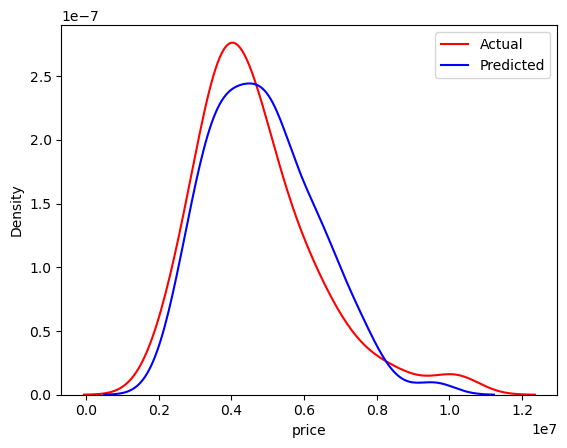

In [49]:
# Create a distribution plot of the actual values in red
sns.distplot(ytest, hist=False, color='red', label='Actual')
# Overlay a distribution plot of the predicted values in blue
sns.distplot(yhat1, hist=False, color='blue', label='Predicted')
# Display the legend
plt.legend()
# Show the plot
plt.show()

# Conclusion

#### Linear Regression for Predicting house prices
#### r2_score : 0.7292983746958301
#### The model has an R-squared (R²) value of 0.729, which indicates that approximately 72.9% of the variability in the house prices can be explained by the model. This suggests that the model has a fairly strong fit to the data.
####  the model does a decent job of explaining the variability in house prices.